<a href="https://colab.research.google.com/github/SilverJester/Delhivery-Case-Study/blob/main/Delhivery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

# Loading dataset and performing basic EDA

In [ ]:
path='/content/drive/MyDrive/Practice datasets /delhivery_data.csv'
df=pd.read_csv(path)
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Dropping unknown fields

In [ ]:
unknown=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(unknown,axis=1,inplace=True)


# Conversion into Categorical Datatype

In [ ]:
for i in df.columns:
  print(f"Unique elements in {i} = {df[i].nunique()}")

Unique elements in data = 2
Unique elements in trip_creation_time = 14817
Unique elements in route_schedule_uuid = 1504
Unique elements in route_type = 2
Unique elements in trip_uuid = 14817
Unique elements in source_center = 1508
Unique elements in source_name = 1498
Unique elements in destination_center = 1481
Unique elements in destination_name = 1468
Unique elements in od_start_time = 26369
Unique elements in od_end_time = 26369
Unique elements in start_scan_to_end_scan = 1915
Unique elements in actual_distance_to_destination = 144515
Unique elements in actual_time = 3182
Unique elements in osrm_time = 1531
Unique elements in osrm_distance = 138046
Unique elements in segment_actual_time = 747
Unique elements in segment_osrm_time = 214
Unique elements in segment_osrm_distance = 113799


In [ ]:
df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')


# Conversion to datetime datatype

In [ ]:
time_columns=['trip_creation_time','od_start_time','od_end_time']
for i in time_columns:
  df[i]=pd.to_datetime(df[i])

In [ ]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
unique,2,NaN,1504,2,14817,1508,1498,1481,1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,NaN,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,NaN,1812,99660,101,23347,23347,15192,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-22 13:34:23.659819264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
min,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,NaN,2018-09-17 03:20:51.775845888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,NaN,2018-09-22 04:24:27.932764928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,NaN,2018-09-27 17:57:56.350054912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


# Handeling missing and duplicate values

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df.dropna(subset=['source_name','destination_name'],axis=0,inplace=True)

In [ ]:
df.duplicated().sum()

0

# Aggregating Fields and merging rows

In [ ]:
df1=df.groupby(['trip_uuid','source_center','destination_center'],as_index=False).agg({'data':'first','trip_creation_time':'first','route_schedule_uuid':'first','route_type':'first','trip_uuid':'first','source_center':'first','source_name':'first','destination_center':'last','destination_name':'last','od_start_time':'first','od_end_time':'first','start_scan_to_end_scan':'first','actual_distance_to_destination':'sum','actual_time':'last','osrm_time':'last','osrm_distance':'last','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,3778.765471,732.0,329.0,446.5496,728.0,534.0,670.6205
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,5082.046634,830.0,388.0,544.8027,820.0,474.0,649.8528
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,53.310332,47.0,26.0,28.1994,46.0,26.0,28.1995
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,186.897974,96.0,42.0,56.9116,95.0,39.0,55.9899
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1725.590250,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,88.326510,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,90.049767,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,21.672374,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,62.547507,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
df1['od_total_time']=df1['od_end_time']-df1['od_start_time']
df1['od_total_time(mins)']=round((df1['od_total_time'].dt.total_seconds())/60,2)
df1.drop(['od_start_time','od_end_time','od_total_time'],axis=1,inplace=True)
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time(mins)
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,3778.765471,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,5082.046634,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,53.310332,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,186.897974,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,1725.590250,611.0,212.0,281.2109,608.0,231.0,317.7408,834.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),62.0,88.326510,51.0,41.0,42.5213,49.0,42.0,42.1431,62.12
26218,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),91.0,90.049767,90.0,48.0,40.6080,89.0,77.0,78.5869,91.09
26219,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),44.0,21.672374,30.0,14.0,16.0185,29.0,14.0,16.0184,44.17
26220,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),287.0,62.547507,233.0,42.0,52.5303,233.0,42.0,52.5303,287.47


In [ ]:
df2=df1.groupby(by='trip_uuid',as_index=False).agg({'data':'first','trip_creation_time':'first','route_schedule_uuid':'first','route_type':'first','source_center':'first','source_name':'first','destination_center':'last','destination_name':'last','od_total_time(mins)':'sum','start_scan_to_end_scan':'sum','actual_distance_to_destination':'sum','actual_time':'sum','osrm_time':'last','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
df2

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,8860.812105,1562.0,388.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,240.208306,143.0,42.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,68163.502238,3347.0,1528.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,239.007304,341.0,27.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,141.057373,83.0,34.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.59,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,93.743842,282.0,24.0,58.9037,281.0,88.0,104.8866
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,355.281673,264.0,14.0,171.1103,258.0,221.0,223.5324


# Extracting destination and source

In [ ]:
def extract_state(x):
  l=x.split('(')
  if len(l)==1:
    return l[0]
  else:
    return l[1].replace(')','')

def extract_city(x):
  l=x.split()[0].split('_')
  return l[0]

def extract_place(x):
  l=x.split()[0].split('_',1)
  if len(l)==1:
    return "unknown place"
  else:
    return l[1]

df2['source_state']=df2['source_name'].apply(extract_state)
df2['source_city']=df2['source_name'].apply(extract_city)
df2['source_place']=df2['source_name'].apply(extract_place)

df2['destination_state']=df2['destination_name'].apply(extract_state)
df2['destination_city']=df2['destination_name'].apply(extract_city)
df2['destination_place']=df2['destination_name'].apply(extract_place)
df2

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,8860.812105,1562.0,388.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,240.208306,143.0,42.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,68163.502238,3347.0,1528.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai,unknown place,Maharashtra,Mumbai,MiraRd_IP
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,239.007304,341.0,27.0,146.7918,340.0,115.0,146.7919,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,141.057373,83.0,34.0,73.4630,82.0,62.0,64.8551,Punjab,Chandigarh,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.59,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883,Haryana,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,93.743842,282.0,24.0,58.9037,281.0,88.0,104.8866,Uttar Pradesh,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,355.281673,264.0,14.0,171.1103,258.0,221.0,223.5324,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,Tirchchndr,Shnmgprm_D


# Extracting month year and day


In [ ]:
df2['month_of_trip']=df2['trip_creation_time'].dt.month_name()
df2['day_of_trip']=df2['trip_creation_time'].dt.day
df2['year_of_trip']=df2['trip_creation_time'].dt.year
df2

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,month_of_trip,day_of_trip,year_of_trip
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,8860.812105,1562.0,388.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,September,12,2018
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,240.208306,143.0,42.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,September,12,2018
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,68163.502238,3347.0,1528.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,September,12,2018
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai,unknown place,Maharashtra,Mumbai,MiraRd_IP,September,12,2018
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,239.007304,341.0,27.0,146.7918,340.0,115.0,146.7919,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,September,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,141.057373,83.0,34.0,73.4630,82.0,62.0,64.8551,Punjab,Chandigarh,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H,October,3,2018
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.59,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883,Haryana,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,October,3,2018
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,93.743842,282.0,24.0,58.9037,281.0,88.0,104.8866,Uttar Pradesh,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC,October,3,2018
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,355.281673,264.0,14.0,171.1103,258.0,221.0,223.5324,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,Tirchchndr,Shnmgprm_D,October,3,2018


In [ ]:
df2.shape

(14787, 27)

# Hypothesis testing between actual time aggregated value and OSRM time aggregated value

##Applying Shapiro Test for Normality

In [ ]:
from scipy.stats import shapiro
h0='actual_time is normally distributed'
h1='actual_time is  not normally distributed'
stattistic,p_value=shapiro(df2['actual_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)


p_value = 3.690425138254441e-76
actual_time is  not normally distributed


In [ ]:
h0='OSRM time is normally distributed'
h1='OSRM time is  not normally distributed'
stattistic,p_value=shapiro(df2['osrm_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 8.064022613501227e-84
OSRM time is  not normally distributed


## Lavenes Test to check for homogeneity of variances

In [ ]:
from scipy.stats import levene
h0='homogeneity of variances'
h1='heterogeneity of variances'
stattistic,p_value=levene(df2['actual_time'].sample(5000),df2['osrm_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 2.233345827288079e-131
heterogeneity of variances


## Applying Mann Whitney U Rank Test

In [ ]:
from scipy.stats import mannwhitneyu
test_stat,p_value=mannwhitneyu(df2['actual_time'],df2['osrm_time'])
print(f"p_value = {p_value}")
if p_value>0.05:
  print("Samples are similar")
else:
  print("Samples are not similar")

p_value = 0.0
Samples are not similar


#Hypothesis Testing between actual_time aggregated value and segment actual time aggregated value.

## Applying Shapiro Test for Normality

In [ ]:
h0='actual_time is normally distributed'
h1='actual_time is  not normally distributed'
stattistic,p_value=shapiro(df2['actual_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 3.319184626230139e-76
actual_time is  not normally distributed


In [ ]:
h0='segment_actual_time is normally distributed'
h1='segment_actual_time is  not normally distributed'
stattistic,p_value=shapiro(df2['segment_actual_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 1.3896935044972854e-76
segment_actual_time is  not normally distributed


##Lavenes Test to check for homogeneity of variances

In [ ]:
h0='homogeneity of variances'
h1='heterogeneity of variances'
stattistic,p_value=levene(df2['actual_time'].sample(5000),df2['segment_actual_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 0.016614790697823897
heterogeneity of variances


##Applying Mann Whitney U Rank Test

In [ ]:
test_stat,p_value=mannwhitneyu(df2['actual_time'],df2['segment_actual_time'])
print(f"p_value = {p_value}")
if p_value>0.05:
  print("Samples are similar")
else:
  print("Samples are not similar")

p_value = 0.41578601931625214
Samples are similar


#Hypothesis Testing between OSRM distance aggregated value and segment OSRM distance aggregated value.

##Applying Shapiro Test for Normality

In [ ]:
h0='osrm_distance  is normally distributed'
h1='osrm_distance  is  not normally distributed'
stattistic,p_value=shapiro(df2['osrm_distance'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 6.538349915875595e-79
osrm_distance  is  not normally distributed


In [ ]:
h0='segment_osrm_distance  is normally distributed'
h1='segment_osrm_distance  is  not normally distributed'
stattistic,p_value=shapiro(df2['segment_osrm_distance'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 7.717621914273144e-80
segment_osrm_distance  is  not normally distributed


##Lavenes Test to check for homogeneity of variances

In [ ]:
h0='homogeneity of variances'
h1='heterogeneity of variances'
stattistic,p_value=levene(df2['osrm_distance'].sample(5000),df2['segment_osrm_distance'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 0.010633011850114114
heterogeneity of variances


##Applying Mann Whitney U Rank Test

In [ ]:
test_stat,p_value=mannwhitneyu(df2['osrm_distance'],df2['segment_osrm_distance'])
print(f"p_value = {p_value}")
if p_value>0.05:
  print("Samples are similar")
else:
  print("Samples are not similar")

p_value = 1.0001087659092072e-06
Samples are not similar


#Hypothesis Testing between OSRM time aggregated value and segment OSRM time aggregated value.

##Applying Shapiro Test for Normality

In [ ]:
h0='osrm_time is normally distributed'
h1='osrm_time is  not normally distributed'
stattistic,p_value=shapiro(df2['osrm_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 4.827672881558992e-84
osrm_time is  not normally distributed


In [ ]:
h0='segment_osrm_time is normally distributed'
h1='segment_osrm_time is  not normally distributed'
stattistic,p_value=shapiro(df2['segment_osrm_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 1.373869601367012e-78
segment_osrm_time is  not normally distributed


##Lavenes Test to check for homogeneity of variances

In [ ]:
h0='homogeneity of variances'
h1='heterogeneity of variances'
stattistic,p_value=levene(df2['osrm_time'].sample(5000),df2['segment_osrm_time'].sample(5000))
print(f"p_value = {p_value}")
if p_value>0.05:
  print(h0)
else:
  print(h1)

p_value = 1.8237790867511904e-37
heterogeneity of variances


##Applying Mann Whitney U Rank Test

In [ ]:
test_stat,p_value=mannwhitneyu(df2['osrm_time'],df2['segment_osrm_time'])
print(f"p_value = {p_value}")
if p_value>0.05:
  print("Samples are similar")
else:
  print("Samples are not similar")

p_value = 0.0
Samples are not similar


# Detecting Outliers

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  category      
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_total_time(mins)             14787 non-null  float64       
 10  start_scan_to_end_scan          14787 non-null  float64       
 11  ac

In [ ]:
numerical_columns=df2.select_dtypes(include='float64').columns.tolist()
numerical_columns

['od_total_time(mins)',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

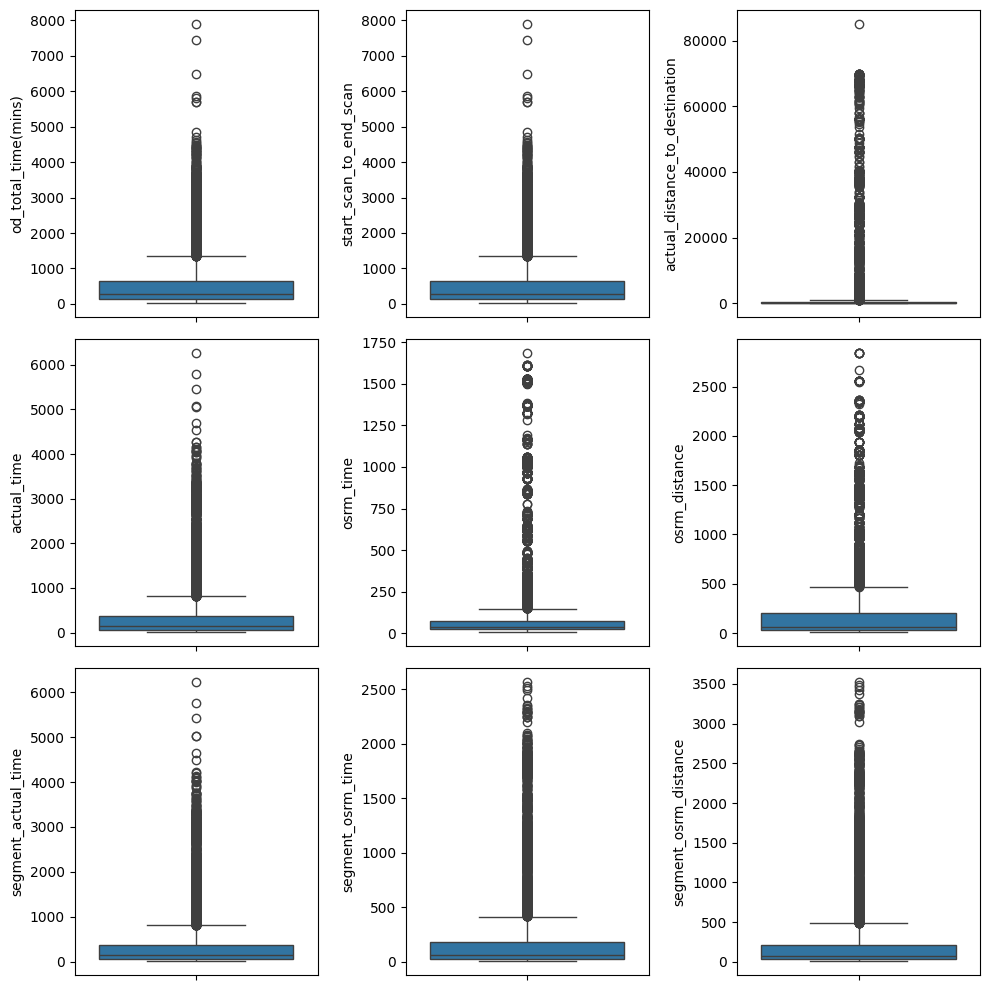

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(10,10))
for i in range(len(numerical_columns)):
  plt.subplot(3,3,i+1)
  sns.boxplot(df2[numerical_columns[i]])
  plt.tight_layout()

In [ ]:
#Clipping using IQR Method
def clipping_outliers(df2,column):
  Q1=df2[column].quantile(0.25)
  Q3=df2[column].quantile(0.75)
  IQR=Q3-Q1
  upper_boundary=Q3+IQR*1.5
  lower_boundary=Q1-IQR*1.5
  df2[column]=np.clip(df2[column],lower_boundary,upper_boundary)
for column in numerical_columns:
  clipping_outliers(df2,column)

# One Hot encoding on categorical columns

In [ ]:
df2['route_type'].value_counts().reset_index()

,route_type,count
0,Carting,8906
1,FTL,5881


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df2['route_type']=label_encoder.fit_transform(df2['route_type'])
df2['route_type'].value_counts()

,count
route_type,
0,8906
1,5881


In [ ]:
df2['data']=label_encoder.fit_transform(df2['data'])
df2['data'].value_counts()

,count
data,
1,10645
0,4142


#Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[numerical_columns]=scaler.fit_transform(df2[numerical_columns])
df2

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,month_of_trip,day_of_trip,year_of_trip
0,trip-153671041653548748,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,September,12,2018
1,trip-153671042288605164,1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),0.118390,0.117735,0.216456,0.165842,0.253521,0.164798,0.164589,0.144254,0.155373,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,September,12,2018
2,trip-153671043369099517,1,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,September,12,2018
3,trip-153671046011330457,1,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),0.057664,0.057743,0.018281,0.061881,0.063380,0.022989,0.062344,0.024450,0.022347,Maharashtra,Mumbai,unknown place,Maharashtra,Mumbai,MiraRd_IP,September,12,2018
4,trip-153671052974046625,1,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),0.520184,0.520435,0.215331,0.410891,0.147887,0.298479,0.412718,0.266504,0.284861,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,September,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,0,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,0,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),0.175598,0.175478,0.123630,0.091584,0.197183,0.139553,0.091022,0.136919,0.115381,Punjab,Chandigarh,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H,October,3,2018
14783,trip-153861104386292051,0,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,0,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),0.027795,0.027747,0.015099,0.014851,0.042254,0.015204,0.014963,0.012225,0.014511,Haryana,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,October,3,2018
14784,trip-153861106442901555,0,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,0,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),0.298435,0.298463,0.079335,0.337871,0.126761,0.107999,0.339152,0.200489,0.198183,Uttar Pradesh,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC,October,3,2018
14785,trip-153861115439069069,0,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),0.243338,0.242970,0.324188,0.315594,0.056338,0.351185,0.310474,0.525672,0.443593,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,Tirchchndr,Shnmgprm_D,October,3,2018


#Business Insights

## Places from where most orders come

In [ ]:
df2['destination_state'].value_counts()

,count
destination_state,
Maharashtra,2561
Karnataka,2294
Haryana,1640
Tamil Nadu,1084
Uttar Pradesh,805
Telangana,784
Gujarat,734
West Bengal,697
Delhi,657


##Distribution of Route Types

In [ ]:
df2['route_type'].value_counts()

,count
route_type,
0,8906
1,5881


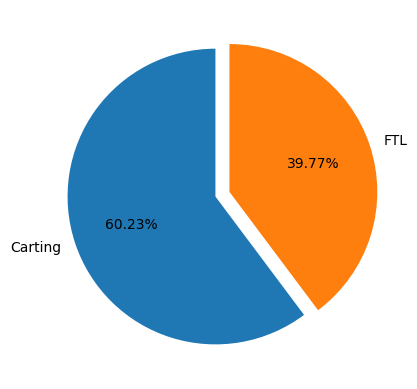

In [ ]:
plt.pie(df2['route_type'].value_counts(),labels=['Carting','FTL'],autopct='%1.2f%%',startangle=90,explode=[0.05,0.05])
plt.show()

##Number of trips created for different days

In [ ]:
df_day=df2.groupby('day_of_trip').agg({'trip_uuid':'count'}).reset_index()
df_day.head(5)

,day_of_trip,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


<Axes: xlabel='day_of_trip', ylabel='trip_uuid'>

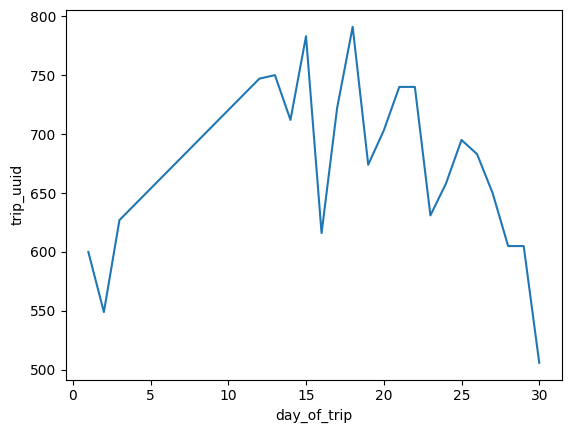

In [ ]:
sns.lineplot(x='day_of_trip',y='trip_uuid',data=df_day)

## Month with the most trips

In [ ]:
(df2['month_of_trip'].value_counts(normalize=True))*100

,proportion
month_of_trip,
September,87.98945
October,12.01055
